step1: understanding business problem
problem statement:a person wants to build a software where if we enter the (saravanampatti) area in sq feet it should return the price

In [9]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv('/content/houserate ds.csv')
df

,area,price
0,1000,4000000
1,1500,4500000
2,2000,4900000
3,2500,5600000
4,3000,6100000
5,3500,6400000
6,4000,7100000


In [6]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [10]:
x=df.drop('price',axis=1)
x

,area
0,1000
1,1500
2,2000
3,2500
4,3000
5,3500
6,4000


In [11]:
y=df['price']
y

0    4000000
1    4500000
2    4900000
3    5600000
4    6100000
5    6400000
6    7100000
Name: price, dtype: int64

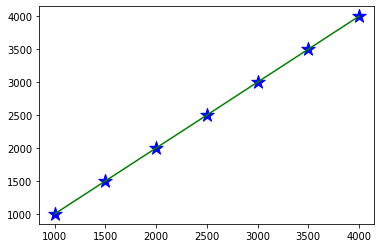

In [12]:
import matplotlib.pyplot as plt
plt.scatter(df['area'],df['area'],s=200,marker="*",color='b')
plt.plot(df['area'],df['area'],color='g')

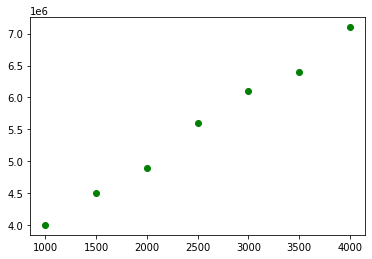

In [13]:
plt.scatter(x,y,color='g',)

BUILD ML MODEL

In [14]:
from sklearn import linear_model
reg=linear_model.LinearRegression()

In [15]:
#machine training- fit(x,y)
#x=input variable
#y=output variable

In [16]:
reg.fit(x,y)#find the best fit line

LinearRegression()

In [17]:
reg.predict([[1900]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([4901428.57142857])

In [18]:
reg.score(x,y)

0.9938277604976672

How ML works?
Linear Regression Formula

y=mX+b

m--> Coef of input variable X

X - input variable (Independent)

y = output variable (dependent variable)

In [19]:
m=reg.coef_
m

array([1021.42857143])

In [20]:
c=reg.intercept_
c

2960714.285714285

download ml model using pickle library

i am going to download my ML model --> Python object --> Binary format

Syntax: 

i am going to create a file with write binary mode and create file object.

Then i am going to store the reg object inside that file.


with open('filename',wb) as f:
    pickle.dump(reg,f)


In [21]:
import pickle # to download the model(reg variabloda values)

In [22]:
with open('saravanampattimodel','wb') as f:
    pickle.dump(reg,f)
  #after this code has executed check the folder whether it is present or not.
  # the go to new colab

In [24]:
reg.predict([[3200]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([6229285.71428571])

In [34]:
import pandas as pd
df=pd.read_csv('/content/client_file1.csv')
import math
area_median=math.floor(df['area'].median())
area_median

2375

In [35]:
df['area']=df['area'].fillna(area_median)
df

,area
0,1200
1,1850
2,2150
3,2600
4,2900
5,3150


In [37]:
yTest=reg.predict(df)
yTest

array([4186428.57142857, 4850357.14285714, 5156785.71428571,
       5616428.57142857, 5922857.14285714, 6178214.28571429])

array([4186428.57142857, 4850357.14285714, 5156785.71428571,
       5616428.57142857, 5922857.14285714, 6178214.28571429])

In [31]:
df['price']=yTest
df

,area,price
0,1200,4.186429e+06
1,1850,4.850357e+06
2,2150,5.156786e+06
3,2600,5.616429e+06
4,2900,5.922857e+06
5,3150,6.178214e+06


In [33]:
df.to_csv('PriceOutputFile.csv',index=False)